In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'C:\Users\scrap\OneDrive\Desktop\vgsales_cleaned.csv', index_col = False)

In [6]:
df.head()

,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
%matplotlib inline

In [5]:
df.columns = ['Unnamed: 0', 'Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

<Axes: title={'center': 'Year and NA_Sales'}, xlabel='Global_Sales', ylabel='NA_Sales'>

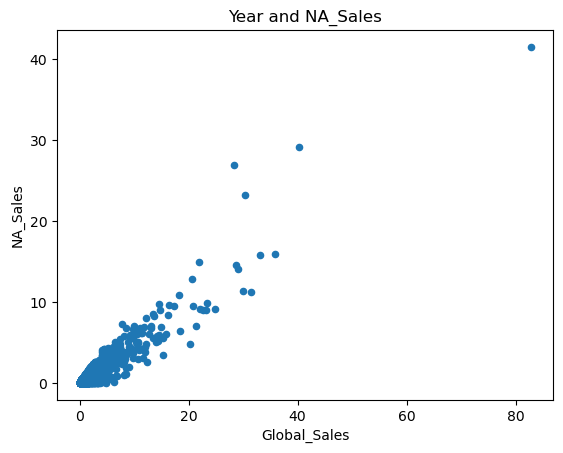

In [7]:
df.plot(kind='scatter', x='Global_Sales', y='NA_Sales', title='Year and NA_Sales')

In [16]:
df.isnull().sum()

Unnamed: 0        0
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [18]:
df.dropna(inplace = True)

In [19]:
#I believe that as the years continue the North America sales will continue to decrease.

In [20]:
X = df['Global_Sales'].values.reshape(-1,1)

In [21]:
y = df['NA_Sales'].values.reshape(-1,1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
X

array([[8.274e+01],
       [4.024e+01],
       [3.582e+01],
       ...,
       [1.000e-02],
       [1.000e-02],
       [1.000e-02]])

In [24]:
y

array([[4.149e+01],
       [2.908e+01],
       [1.585e+01],
       ...,
       [0.000e+00],
       [0.000e+00],
       [1.000e-02]])

In [25]:
regression = LinearRegression()

In [28]:
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [29]:
y_predicted = regression.predict(X_test)

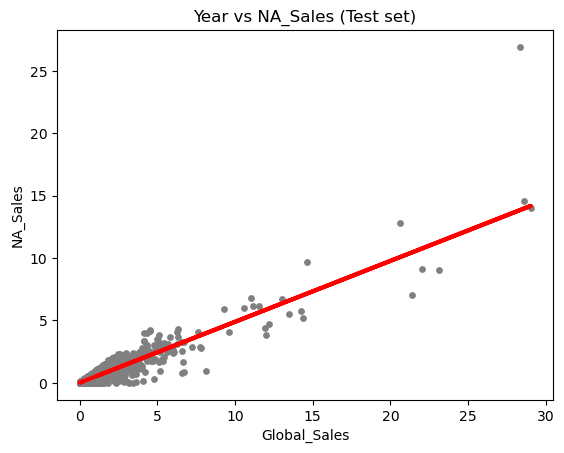

In [30]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year vs NA_Sales (Test set)')
plot_test.xlabel('Global_Sales')
plot_test.ylabel('NA_Sales')
plot_test.show()